In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
red_df = pd.read_csv("winequality-red.csv", sep=";")
whi_df = pd.read_csv("winequality-white.csv", sep=";")

In [4]:
red_df.info()
# We can see that there are no null-values for the following dataset. All the
# features have numerical values. We will be able to perform mathematical 
# operations like describe, value_counts giving has valueable observations.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
red_df.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [6]:
red_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# We can see from the trends of the percentile values.
# There is a huge difference between the max values of "residual sugar", 
# "chlorides", "free sulfur dioxide", "total sulfur dioxide" to the 75th percentile.
# This is indication that the values of them doesn't lie in the general range of 
# the dataset. The max values might be "OUTLIERS" here.

In [8]:
red_df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [9]:
# We can understand that the output of quality is discrete and categorical 
# in nature. We were given that the quality will lie between 1-10. So there
# is discrete values ranging from 1-10 as our target value.

Text(0.5, 1.0, 'Distribution of Quality')

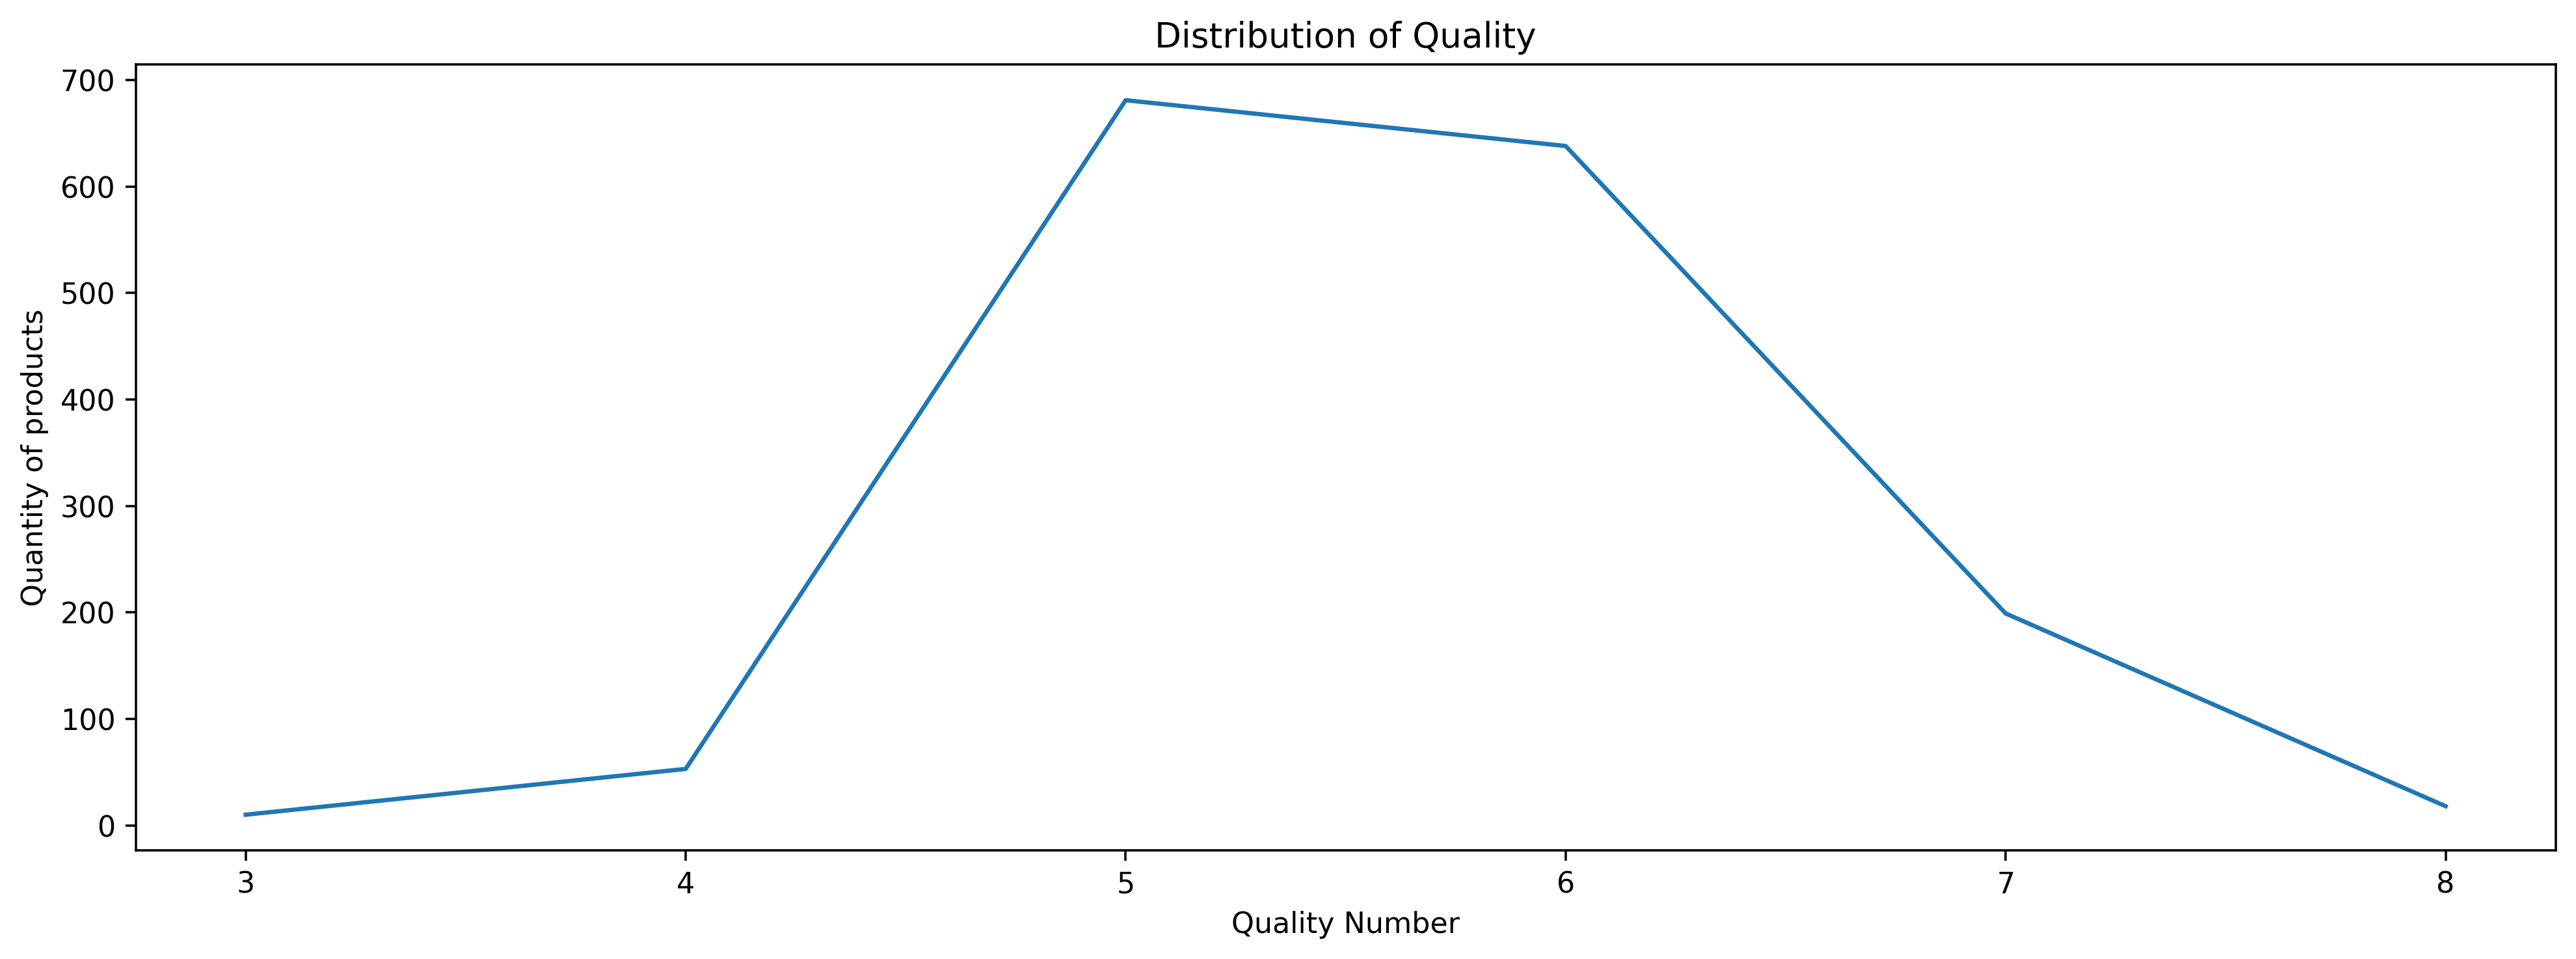

In [16]:
graph_data = red_df['quality'].value_counts().sort_index()
plt.figure(figsize=(15,5),dpi=320)
plt.plot(graph_data)
plt.xlabel('Quality Number')
plt.ylabel('Quantity of products')
plt.title('Distribution of Quality')

In [17]:
# The datset is "SKEWED" towards products belonging to medium quality of ratings.
# There is less number of observations for products of quality 3 and 8.

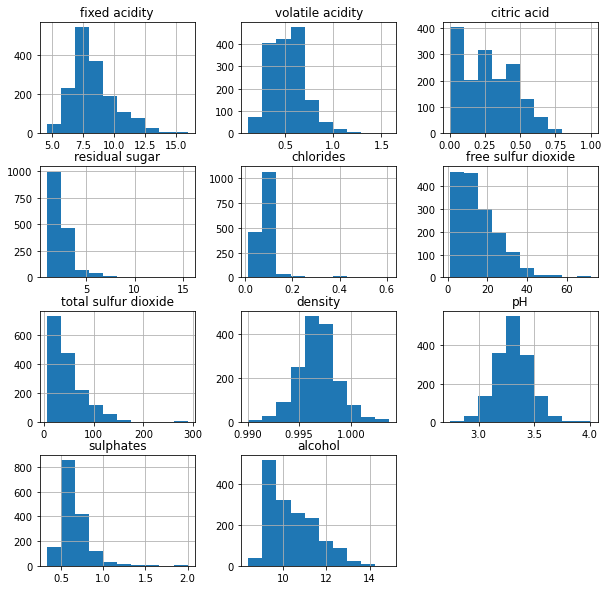

<Figure size 432x288 with 0 Axes>

In [28]:
Y = red_df['quality']
X = red_df.drop(columns='quality')
X.hist(bins=10, figsize=(10,10))
plt.show()
plt.tight_layout()

<AxesSubplot:>

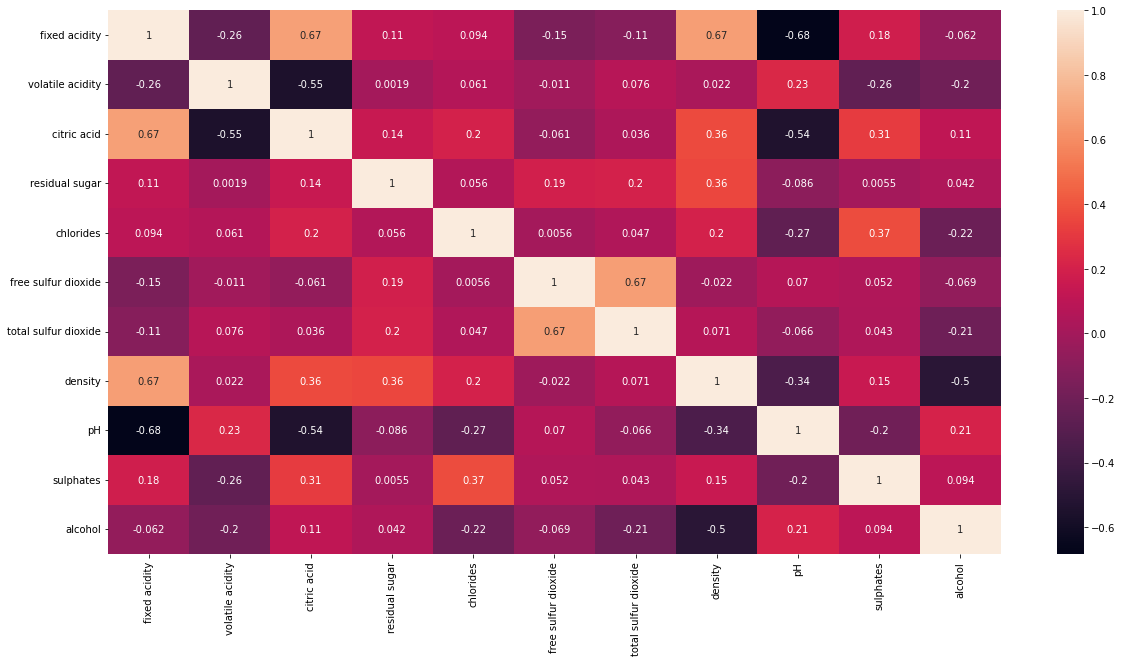

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(),annot=True)

In [26]:
X.corr()['alcohol']

fixed acidity          -0.061668
volatile acidity       -0.202288
citric acid             0.109903
residual sugar          0.042075
chlorides              -0.221141
free sulfur dioxide    -0.069408
total sulfur dioxide   -0.205654
density                -0.496180
pH                      0.205633
sulphates               0.093595
alcohol                 1.000000
Name: alcohol, dtype: float64

In [27]:
X.corr()['pH']

fixed acidity          -0.682978
volatile acidity        0.234937
citric acid            -0.541904
residual sugar         -0.085652
chlorides              -0.265026
free sulfur dioxide     0.070377
total sulfur dioxide   -0.066495
density                -0.341699
pH                      1.000000
sulphates              -0.196648
alcohol                 0.205633
Name: pH, dtype: float64